In [14]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits.mplot3d import Axes3D
from time import sleep
from scipy.optimize import minimize
%matplotlib inline

In [133]:
# True Values
mu = 10
sigma = 2
n = 100
n_rep = 100
np.random.seed(1234)
samples = np.random.normal(loc=mu, scale=sigma, size=(n_rep, n))
start_vectors = np.zeros((n_rep, 2))
start_vectors[:, 0] = np.random.uniform(5, 15, size=n_rep)
start_vectors[:, 1] = np.log(np.random.uniform(1, 3, size=n_rep))

In [134]:
# Criterion functions
def neg_log_likelihood(x, sample):
    mu = x[0]
    sigma = np.exp(x[1])
    likelihoods = scipy.stats.norm.pdf(sample, loc=mu, scale=sigma)
    return - np.log(likelihoods).mean()


def msm_criterion(x, sample):
    mu = x[0]
    sigma = np.exp(x[1])
    simulated_sample = np.random.normal(loc=mu, scale=sigma, size=len(sample))
    m_emp = np.array([[sample.mean()], [sample.std()]])
    m_sim = np.array([[simulated_sample.mean()], [simulated_sample.std()]])
    diff = m_emp - m_sim
    w = np.eye(2)
    return diff.T.dot(w).dot(diff)[0][0]


def smooth_msm_criterion(x, sample):
    mu = x[0]
    sigma = np.exp(x[1])
    np.random.seed(5471)
    simulated_sample = np.random.normal(size=len(sample)) * sigma + mu
    m_emp = np.array([[sample.mean()], [sample.std()]])
    m_sim = np.array([[simulated_sample.mean()], [simulated_sample.std()]])
    diff = m_emp - m_sim
    w = np.eye(2)
    return diff.T.dot(w).dot(diff)[0][0]

In [135]:
estimators = {'likelihood': neg_log_likelihood, 'msm': msm_criterion, 'smooth_msm': smooth_msm_criterion}
methods = {'likelihood': 'BFGS', 'msm': 'Nelder-Mead', 'smooth_msm': 'BFGS'}
results = {}

for est, criterion in estimators.items():
    estimates = []
    for i in range(n_rep):
        res = minimize(criterion, start_vectors[i], args=(samples[i], ), method=methods[est])
        estimates.append(list(res.x))
    results[est] = estimates   

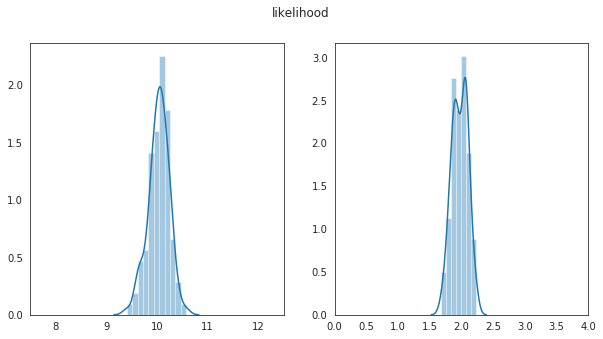

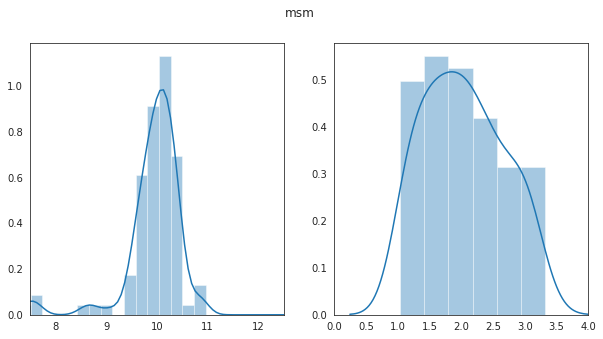

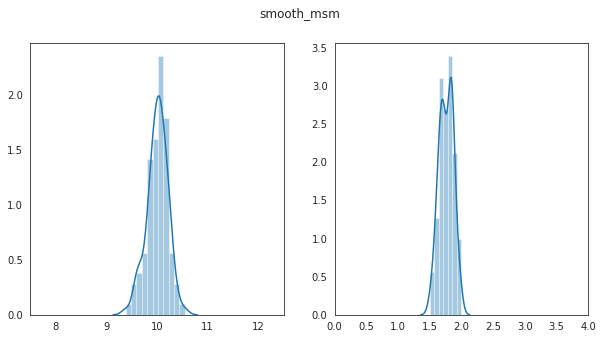

In [139]:
for name, res in results.items():
    res_arr = np.array(res)
    mus = res_arr[:, 0]
    sigmas = np.exp(res_arr[:, 1])
    fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
    distplot_options = {'hist': True}
    sns.distplot(mus, ax=axes[0], **distplot_options)
    sns.distplot(sigmas, ax=axes[1], **distplot_options)
    axes[0].set_xlim((7.5, 12.5))
    axes[1].set_xlim((0, 4))
    fig.suptitle(name)

In [138]:
sns.distplot?